In [1]:
from astropy.io import ascii 

In [2]:
#data = ascii.read('pulsars_gaia_xmatch.csv')
data = ascii.read('ipta_pulsars_gaia_xmatch.csv')

In [3]:
data.keys()

['angDist',
 'col1',
 'col2',
 'col3',
 'ra_ep2000',
 'dec_ep2000',
 'errHalfMaj',
 'errHalfMin',
 'errPosAng',
 'ra',
 'dec',
 'source_id',
 'ref_epoch',
 'ra_error',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'duplicated_source',
 'phot_g_n_obs',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_mag',
 'phot_variable_flag',
 'l',
 'b']

In [4]:
data['phot_g_mean_mag']

20.255
18.209
19.557
19.042
20.31
16.264
20.56
17.995
19.323
16.19
14.464


In [5]:
from pygaia.errors.astrometric import parallaxErrorSkyAvg

In [6]:
sigmaPar=parallaxErrorSkyAvg(data['phot_g_mean_mag'], -0.5)

In [38]:
sigmaPar 

764.413239046
155.291154722
426.738127815
284.110263824
801.324056738
49.0961397765
994.683909138
134.535895164
353.720383404
47.2409024277
20.2084526652


In [39]:
data['col1']

J0437-4715
J0613-0200
J1012+5307
J1024-0719
J1603-7202
J1730-2304
J1744-1134
J1751-2857
J1801-1417
J1804-2717
J1824-2452A


In [8]:
data['col1']

J0437-4715
J0613-0200
J1012+5307
J1024-0719
J1603-7202
J1730-2304
J1744-1134
J1751-2857
J1801-1417
J1804-2717
J1824-2452A


In [9]:
1/5./(sigmaPar*1e-3)

0.261638587329
1.28790336035
0.468671503584
0.703952040691
0.249586915953
4.07364002364
0.201068900545
1.48659210804
0.565418362593
4.23361937901
9.8968487748


In [10]:
data['angDist']

0.556052
4.436126
0.360541
0.857824
4.894165
3.64931
1.858766
3.00057
4.497614
2.720735
2.936042


In [11]:
def gaussian(mean, sigma, array, amplitude=1.0):
    return amplitude/np.sqrt(2.*np.pi*sigma**2.)*np.exp(-(array - mean)**2./(2.*sigma**2.))

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [13]:
x = np.linspace(0.01, 10, 10000)

In [14]:
distance = 100. #pc
parallax = 1/distance
plt.plot(x, gaussian(parallax, ))

TypeError: gaussian() takes at least 3 arguments (1 given)

In [15]:
distdata = ascii.read('ipta_pulsarDist_4Gaia.txt')

In [16]:
distdata.keys()

['name', 'distance', 'plus', 'minus']

In [17]:
distdata

name,distance,plus,minus
str16,float64,float64,float64
J0437-4715,0.156,0.001,0.001
J0613-0200,0.9,0.4,0.2
J1012+5307,0.7,0.2,0.1
J1024-0719,0.49,0.12,0.08
J1603-8722-7202,1.2,0.2,0.2
J1730-8722-2304,0.5,0.1,0.1
J1744-8722-1134,0.42,0.02,0.02
J1751-8722-2857,1.1,0.2,0.2
J1801-8722-1417,1.5,0.3,0.3


In [33]:
data

angDist,col1,col2,col3,ra_ep2000,dec_ep2000,errHalfMaj,errHalfMin,errPosAng,ra,dec,source_id,ref_epoch,ra_error,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b
float64,str11,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,str13,float64,float64
0.556052,J0437-4715,69.3163808,-47.2525883,69.31657656,-47.25266705,0.003,0.002,0,69.31657656,-47.25266705,4.78986e+18,2015,1.992,2.741,--,--,--,--,--,--,-0.671,0,65,128.0,2.47,20.255,NOT_AVAILABLE,253.394617,-41.96315524
4.436126,J0613-0200,93.4332329,-2.0131189,93.43200102,-2.013171942,0.012,0.011,90,93.43200102,-2.013171942,3.11803e+18,2015,12.242,11.475,--,--,--,--,--,--,-0.999,0,53,844.0,3.08,18.209,NOT_AVAILABLE,210.4125257,-9.306027617
0.360541,J1012+5307,153.139333,53.117367,153.1393296,53.11726687,0.001,0.0,0,153.1393296,53.11726687,8.51611e+17,2015,0.395,0.614,--,--,--,--,--,--,0.058,0,148,244.0,1.93,19.557,NOT_AVAILABLE,160.3471938,50.85785326
0.857824,J1024-0719,156.161237,-7.321964,156.1610974,-7.322157955,0.011,0.007,0,156.1610974,-7.322157955,3.77528e+18,2015,6.547,11.16,--,--,--,--,--,--,-0.857,0,33,392.0,4.94,19.042,NOT_AVAILABLE,251.7016017,40.51539562
4.894165,J1603-7202,240.8986658,-72.04241622,240.8960554,-72.0435119,0.009,0.004,90,240.8960554,-72.0435119,5.80668e+18,2015,9.32,4.287,--,--,--,--,--,--,0.779,0,58,122.0,2.18,20.31,NOT_AVAILABLE,316.6282976,-14.49575836
3.64931,J1730-2304,262.5902012,-23.0753889,262.5908742,-23.07458625,0.001,0.001,90,262.5908742,-23.07458625,4.11143e+18,2015,0.94,0.692,--,--,--,--,--,--,0.96,0,69,5060.0,9.41,16.264,NOT_AVAILABLE,3.138109656,6.023224423
1.858766,J1744-1134,266.1225429,-11.5818686,266.1224655,-11.58135787,0.008,0.007,90,266.1224655,-11.58135787,4.16235e+18,2015,8.326,7.263,--,--,--,--,--,--,0.967,0,35,96.8,2.98,20.56,NOT_AVAILABLE,14.7942774,9.18002811
3.00057,J1751-2857,267.886238,-28.962917,267.8869194,-28.96349948,0.003,0.003,90,267.8869194,-28.96349948,4.05735e+18,2015,2.953,2.642,--,--,--,--,--,--,0.984,0,70,1030.0,4.68,17.995,NOT_AVAILABLE,0.645370511,-1.125092443
4.497614,J1801-1417,270.4628212,-14.2929297,270.4628377,-14.29417894,0.012,0.011,90,270.4628377,-14.29417894,4.14707e+18,2015,11.562,10.968,--,--,--,--,--,--,0.999,0,71,302.0,2.34,19.323,NOT_AVAILABLE,14.54519204,4.161222507


In [18]:
distGaiaErr = sigmaPar*1e-3*distdata['distance']**2.

In [19]:
distdata['plus']

0.001
0.4
0.2
0.12
0.2
0.1
0.02
0.2
0.3
0.2
1.0


(0.1, 10)

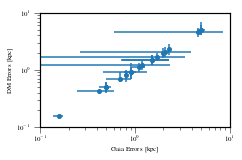

In [34]:
plt.errorbar(distdata['distance'], distdata['distance'], fmt='o', xerr=sigmaPar*1e-3*distdata['distance']**2.,\
             yerr=[distdata['minus'], distdata['plus']])
plt.xlabel('Gaia Errors [kpc]')
plt.ylabel('DM Errors [kpc]')
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1, 10)
plt.ylim(0.1, 10)

Text(0,0.5,u'DM Uncertainty')

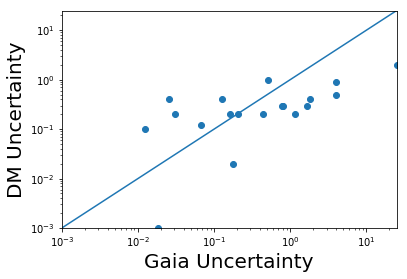

In [21]:
plt.scatter(distGaiaErr, distdata['plus'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001, 25)
plt.ylim(0.001, 25)
plt.plot([0.001, 25], [0.001, 25])
plt.xlabel('Gaia Uncertainty', fontsize=20)
plt.ylabel('DM Uncertainty', fontsize=20)

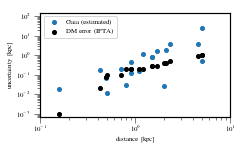

In [30]:
plt.scatter(distdata['distance'], distGaiaErr, label='Gaia (estimated)')
#plt.scatter(distdata['distance'], distdata['plus'], color='grey', label='DM minus')
plt.scatter(distdata['distance'], distdata['minus'], color='black', label='DM error (IPTA)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 10)
plt.ylim(0.0007, 150)
plt.xlabel('distance [kpc]')
plt.ylabel('uncertainty [kpc]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('futureGaiaUncertainties.jpg')

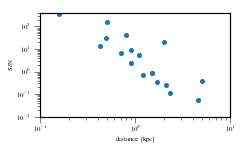

In [29]:
plt.scatter(distdata['distance'], 1./distdata['distance']/distGaiaErr)
plt.yscale('log')
plt.ylim(0.01, 400)
plt.xscale('log')
plt.xlim(0.1, 10)
plt.xlabel('distance [kpc]')
plt.ylabel('S/N')
plt.tight_layout()
plt.savefig('gaiaSN.jpg')

In [36]:
distGaiaErr*1000

18.6027605854
125.785835325
209.101682629
68.2148743441
1153.9066417
12.2740349441
175.462241572
162.788433149
795.870862659
30.2341775538
505.21131663


In [24]:
fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 4,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

In [41]:
NG11_RA = 308.364632875
NG11_DEC = 17.582909611111113

In [42]:
G_RA = 308.365031534108
G_DEC = 17.58363472799394

In [44]:
diff_RA = NG11_RA-G_RA
diff_DEC = NG11_DEC - G_DEC

In [46]:
import math

In [47]:
error_RA = diff_RA*3600*math.cos(NG11_DEC*math.pi/180.)

In [48]:
error_RA

-1.3681226893001448

In [ ]:
Delta_RA = (308.3650315341085-308.364632875)*3600.*math.cos(17.58363*(math.pi/180)) = 1.4 arcsec = 1400 mas
Delat=Dec = (17.58363472799394-17.582909611111113)*3600. = 2.6 arcsec = 2600 mas